In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("empathy.csv")
df.head()

,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y,Unnamed: 70,empathy_score
0,6777340,5.150000e+11,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,53:17.0,...,525,20,908.0,316.0,"0,4688","0,2924",NaN,NaN,NaN,13
1,6785675,5.150000e+11,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,53:17.0,...,525,20,908.0,316.0,"0,4688","0,2924",NaN,NaN,NaN,19
2,6794004,5.150000e+11,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,53:17.0,...,525,20,908.0,316.0,"0,4688","0,2924",NaN,NaN,NaN,15
3,6802338,5.150000e+11,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,53:17.0,...,525,20,908.0,316.0,"0,4688","0,2924",NaN,NaN,NaN,18
4,6810673,5.150000e+11,Eye Tracker,Control group experiment,30.09.2020,Participant0002,Recording2,30.09.2020,30.09.2020,53:17.0,...,525,20,908.0,316.0,"0,4688","0,2924",NaN,NaN,NaN,20


In [3]:
df.dtypes

Recording timestamp             int64
Computer timestamp            float64
Sensor                         object
Project name                   object
Export date                    object
                               ...   
Fixation point Y (MCSnorm)     object
Mouse position X              float64
Mouse position Y              float64
Unnamed: 70                   float64
empathy_score                   int64
Length: 72, dtype: object

In [4]:
df.describe

<bound method NDFrame.describe of      Recording timestamp  Computer timestamp       Sensor  \
0                6777340        5.150000e+11  Eye Tracker   
1                6785675        5.150000e+11  Eye Tracker   
2                6794004        5.150000e+11  Eye Tracker   
3                6802338        5.150000e+11  Eye Tracker   
4                6810673        5.150000e+11  Eye Tracker   
..                   ...                 ...          ...   
847             13660143        5.150000e+11  Eye Tracker   
848             13668509        5.150000e+11  Eye Tracker   
849             13676800        5.150000e+11  Eye Tracker   
850             13685119        5.150000e+11  Eye Tracker   
851             13693454        5.150000e+11  Eye Tracker   

                 Project name Export date Participant name Recording name  \
0    Control group experiment  30.09.2020  Participant0002     Recording2   
1    Control group experiment  30.09.2020  Participant0002     Recording2   
2 

In [5]:
df['Eye movement type index']

0      20
1      20
2      20
3      20
4      20
       ..
847    44
848    44
849    44
850    44
851    44
Name: Eye movement type index, Length: 852, dtype: int64

In [6]:
columns_to_drop = ['Export date', 'Recording name', 'Recording duration', 'Recording Fixation filter name', 'Recording software version', 'Recording resolution height', 'Recording resolution width', 'Recording monitor latency', 'Event', 'Event value', 'Validity left', 'Validity right', 'Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)', 'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)', 'Gaze point left X (DACSmm)', 'Gaze point left Y (DACSmm)', 'Gaze point right X (DACSmm)', 'Gaze point right Y (DACSmm)', 'Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)', 'Gaze point left X (MCSnorm)', 'Gaze point left Y (MCSnorm)', 'Gaze point right X (MCSnorm)', 'Gaze point right Y (MCSnorm)', 'Presented Media name', 'Presented Media position X (DACSpx)', 'Presented Media position Y (DACSpx)', 'Original Media width', 'Original Media height', 'Gaze event duration', 'Mouse position X', 'Mouse position Y']
df.drop(columns_to_drop, axis=1, inplace=True)


In [7]:
column_names = {'Recording timestamp': 'recording_timestamp', 'Computer timestamp': 'computer_timestamp', 'Sensor': 'sensor', 'Project name': 'project_name', 'Participant name': 'participant_name', 'Recording date': 'recording_date', 'Recording date UTC': 'recording_date_utc', 'Recording start time': 'recording_start_time', 'Recording start time UTC': 'recording_start_time_utc', 'Timeline name': 'timeline_name', 'Gaze point X': 'gaze_point_x', 'Gaze point Y': 'gaze_point_y', 'Gaze point left X': 'gaze_point_left_x', 'Gaze point left Y': 'gaze_point_left_y', 'Gaze point right X': 'gaze_point_right_x', 'Gaze point right Y': 'gaze_point_right_y', 'Gaze direction left X': 'gaze_direction_left_x', 'Gaze direction left Y': 'gaze_direction_left_y', 'Gaze direction left Z': 'gaze_direction_left_z', 'Gaze direction right X': 'gaze_direction_right_x','Gaze direction right Y': 'gaze_direction_right_y', 'Gaze direction right Z': 'gaze_direction_right_z', 'Pupil diameter left': 'pupil_diameter_left', 'Pupil diameter right': 'pupil_diameter_right', 'Presented Stimulus name': 'presented_stimulus_name', 'Presented Media width': 'presented_media_width', 'Presented Media height': 'presented_media_height', 'Fixation point X': 'fixation_point_x', 'Fixation point Y': 'fixation_point_y', 'Fixation point X (MCSnorm)': 'fixation_point_x_norm', 'Fixation point Y (MCSnorm)': 'fixation_point_y_norm'}
df.rename(columns=column_names, inplace=True)

In [8]:
df['sensor'] = df['sensor'].astype('category')
df['project_name'] = df['project_name'].astype('category')
df['participant_name'] = df['participant_name'].astype('category')
df['timeline_name'] = df['timeline_name'].astype('category')
df['presented_stimulus_name'] = df['presented_stimulus_name'].astype('category')


In [9]:
df['gaze_direction_left_z'] = df['gaze_direction_left_z'].astype(bool)
df['gaze_direction_right_z'] = df['gaze_direction_right_z'].astype(bool)


In [10]:
df['gaze_point_x'] = df['gaze_point_x'] / df['presented_media_width']
df['gaze_point_y'] = df['gaze_point_y'] / df['presented_media_height']
df['gaze_point_left_x'] = df['gaze_point_left_x'] / df['presented_media_width']
df['gaze_point_left_y'] = df['gaze_point_left_y'] / df['presented_media_height']
df['gaze_point_right_x'] = df['gaze_point_right_x'] / df['presented_media_width']
df['gaze_point_right_y'] = df['gaze_point_right_y'] / df['presented_media_height']



<Axes: xlabel='gaze_point_x', ylabel='Count'>

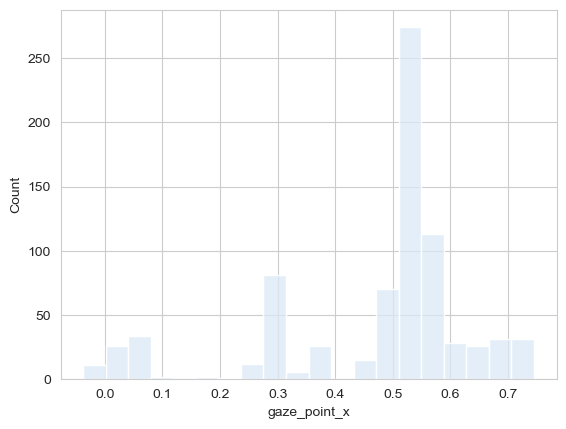

In [21]:
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('Blues')
sns.histplot(df['gaze_point_x'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15508\338325233.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


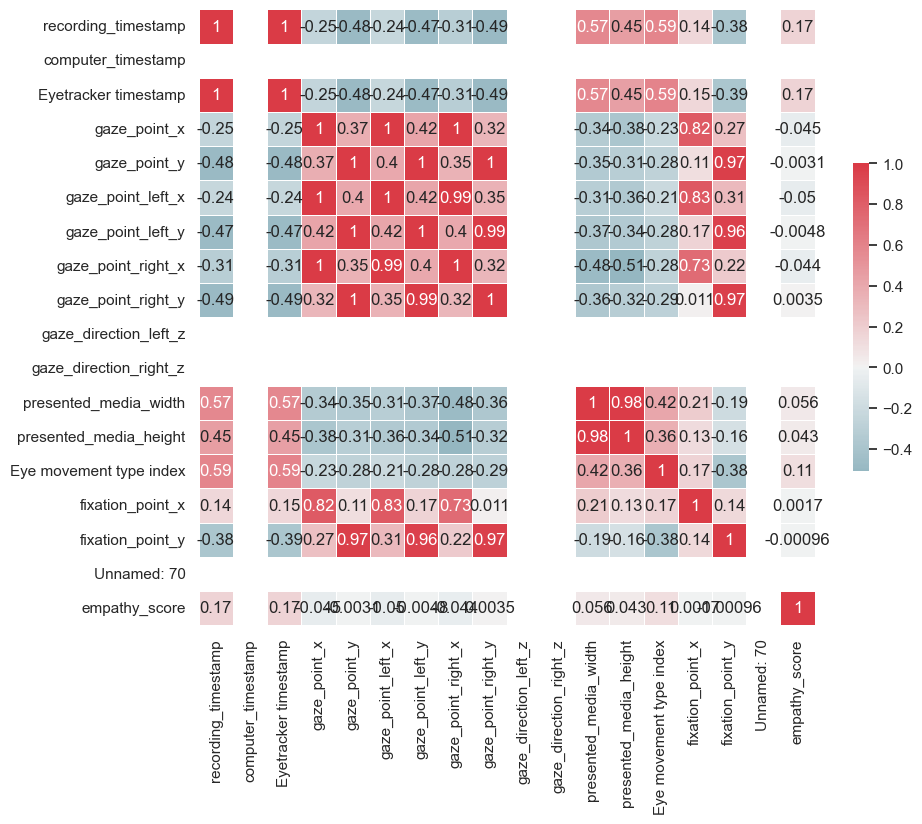

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
sns.set(style="white")
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

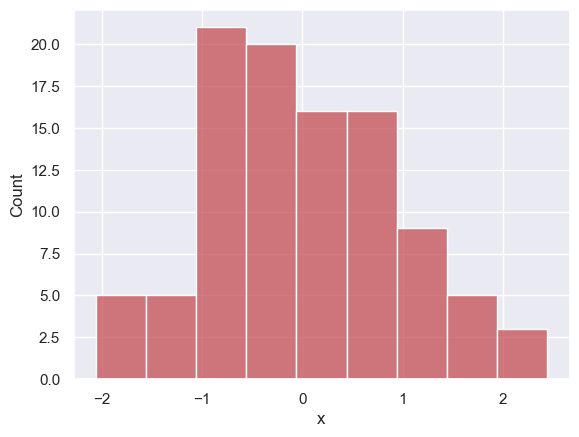

In [26]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

data = pd.DataFrame({'x': np.random.randn(100), 'y': np.random.randn(100)})
plot_type = np.random.choice(['scatter', 'line', 'histogram', 'kde'])

color = 'r'

if plot_type == 'scatter':
    sns.scatterplot(x='x', y='y', data=data, color=color)
elif plot_type == 'line':
    sns.lineplot(x='x', y='y', data=data, color=color)
elif plot_type == 'histogram':
    sns.histplot(x='x', data=data, color=color)
else:
    sns.kdeplot(x='x', data=data, color=color)

plt.show()

<Axes: ylabel='Count'>

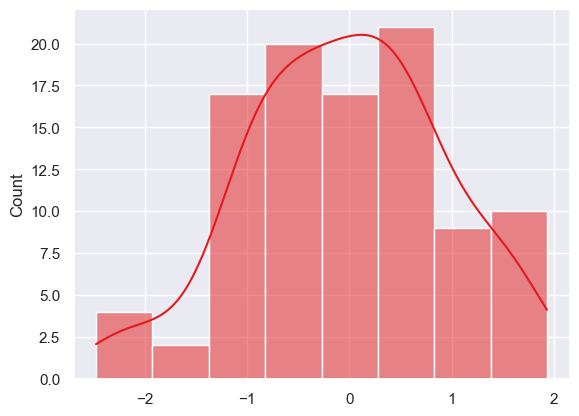

In [28]:
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")
sns.set_palette("Set1")
data = np.random.normal(loc=0, scale=1, size=100)
sns.histplot(data, kde=True)

<Axes: xlabel='gaze_point_x', ylabel='gaze_point_y'>

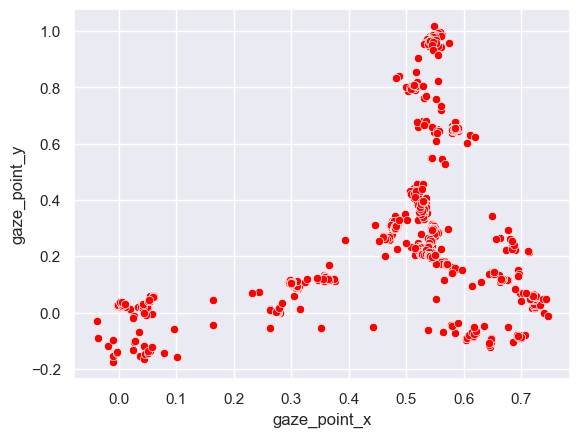

In [30]:
import seaborn as sns
sns.scatterplot(x='gaze_point_x', y='gaze_point_y', data=df, color='red')

In [18]:
df.columns

Index(['recording_timestamp', 'computer_timestamp', 'sensor', 'project_name',
       'participant_name', 'recording_date', 'recording_date_utc',
       'recording_start_time', 'recording_start_time_utc', 'timeline_name',
       'Eyetracker timestamp', 'gaze_point_x', 'gaze_point_y',
       'gaze_point_left_x', 'gaze_point_left_y', 'gaze_point_right_x',
       'gaze_point_right_y', 'gaze_direction_left_x', 'gaze_direction_left_y',
       'gaze_direction_left_z', 'gaze_direction_right_x',
       'gaze_direction_right_y', 'gaze_direction_right_z',
       'pupil_diameter_left', 'pupil_diameter_right',
       'presented_stimulus_name', 'presented_media_width',
       'presented_media_height', 'Eye movement type',
       'Eye movement type index', 'fixation_point_x', 'fixation_point_y',
       'fixation_point_x_norm', 'fixation_point_y_norm', 'Unnamed: 70',
       'empathy_score'],
      dtype='object')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['gaze_point_x', 'gaze_point_y', 'Eye movement type index', 'fixation_point_x_norm', 'fixation_point_y_norm']]
y = df['empathy_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


ValueError: could not convert string to float: '0,5302'

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['sensor'], axis=1), df['sensor'], test_size=0.3, random_state=42)


In [ ]:
X_train_encoded = pd.get_dummies(X_train, columns=['project_name', 'participant_name', 'timeline_name', 'presented_stimulus_name', 'eye_movement_type'])
X_test_encoded = pd.get_dummies(X_test, columns=['project_name', 'participant_name', 'timeline_name', 'presented_stimulus_name', 'eye_movement_type'])


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = ['gaze_point_x', 'gaze_point_y', 'gaze_point_left_x', 'gaze_point_left_y', 'gaze_point_right_x', 'gaze_point_right_y', 'fixation_point_x', 'fixation_point_y', 'fixation_point_x_norm', 'fixation_point_y_norm']

X_train_encoded[numeric_cols] = scaler.fit_transform(X_train_encoded[numeric_cols])
float_list1 = [float(x) for x in string_list]
X_test_encoded[numeric_cols] = scaler.transform(X_test_encoded[numeric_cols])


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_encoded, y_train)


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_encoded)

print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_encoded, y_train, cv=5)

print('Cross-validation scores:', scores)
print('Average cross-validation score:', np.mean(scores))
